## Stability in the Linear Time Trend Model

Stability for the model where

$$     \mathbf K_{ij} = \beta^\theta 
        \exp [ (1-\gamma)  (\mu + x_j - x_i)] \mathbf Q_{ij}
$$

In [1]:
include("src/tallarini_discretized.jl")

compute_spec_rad_ltt (generic function with 1 method)

### Experiments with some common parameterizations

In [4]:
compute_spec_rad_ltt(γ=10.0, ψ=1.5)

(1.0956623519733184, -26.999999999999996)

In [6]:
compute_spec_rad_ltt(γ=10.0, ρ=0.5, ψ=1.5)

(1.0956623519733188, -26.999999999999996)

### Spectral Radius Plots

In [5]:
using PyPlot
plt = PyPlot

PyPlot

In [13]:
J = 20 # grid size

x_vals = linspace(1.5, 3.5, J)      # psi
y_vals = linspace(0.98, 0.995, J)       # beta

R = Array{Float64}(J, J);

In [14]:
for (i, ψ) in enumerate(x_vals)
    for (j, β) in enumerate(y_vals)
        R[i, j], θ = compute_spec_rad_ltt(ψ=ψ, β=β, γ=11.0)
        @assert θ < 0 "Detected non-negative theta value"
    end
end

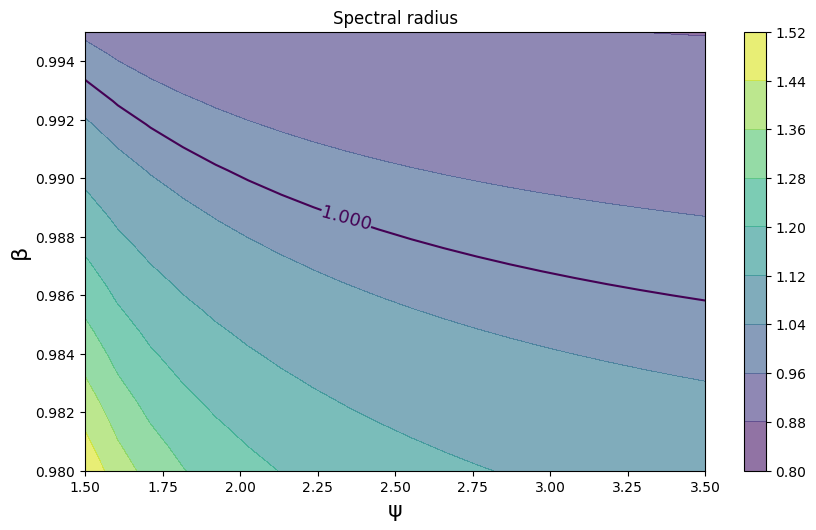

In [15]:
fig, ax = plt.subplots(figsize=(10, 5.7))

xgrid = repmat(x_vals', J, 1 )
ygrid = repmat(y_vals, 1, J )

#lvs = [0.0, 0.8, 1.0, 1.4, 1.8, 2.2, 4.4]
#cls = [cm.jet(i) for i in np.linspace(0.4, 1, len(lvs))]

cs1 = ax[:contourf](x_vals, 
                    y_vals, 
                    R',
                    alpha=0.6)
                    #levels=lvs,


ctr1 = ax[:contour](x_vals, 
                    y_vals, 
                    R', 
                    levels=[1.0])

plt.clabel(ctr1, inline=1, fontsize=13)
plt.colorbar(cs1, ax=ax)

ax[:set_title]("Spectral radius")
ax[:set_xlabel]("ψ", fontsize=16)
ax[:set_ylabel]("β", fontsize=16)

plt.savefig("foo.pdf")
plt.show()

### Let's try varying correlation

In [29]:
J = 20 # grid size

x_vals = linspace(0.5, 0.99, J)     # rho
y_vals = linspace(0.99, 0.995, J)     # beta

R = Array{Float64}(J, J);

In [32]:
for (i, ρ) in enumerate(x_vals)
    for (j, β) in enumerate(y_vals)
        R[i, j], θ = compute_spec_rad_ltt(ρ=ρ, β=β, γ=8.0)
        @assert θ < 0 "Detected non-negative theta value"
    end
end

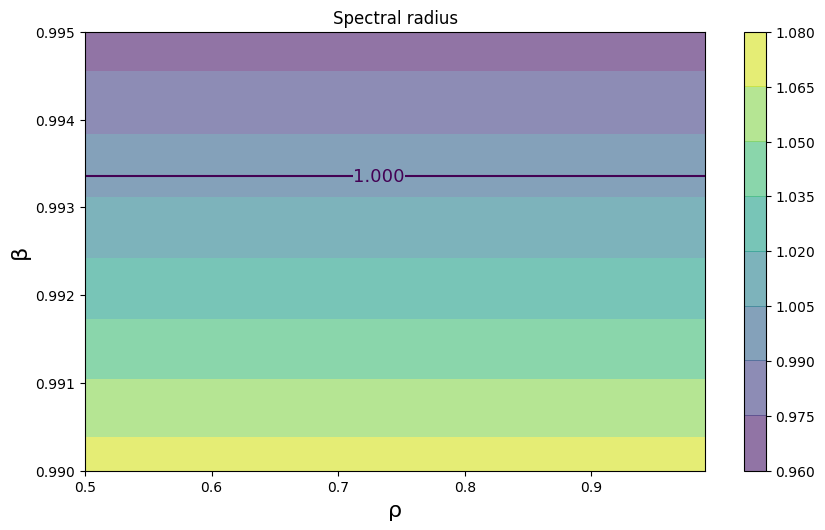

In [33]:
fig, ax = plt.subplots(figsize=(10, 5.7))

xgrid = repmat(x_vals', J, 1 )
ygrid = repmat(y_vals, 1, J )

#lvs = [0.0, 0.8, 1.0, 1.4, 1.8, 2.2, 4.4]
#cls = [cm.jet(i) for i in np.linspace(0.4, 1, len(lvs))]

cs1 = ax[:contourf](x_vals, 
                    y_vals, 
                    R',
                    alpha=0.6)
                    #levels=lvs,


ctr1 = ax[:contour](x_vals, 
                    y_vals, 
                    R', 
                    levels=[1.0])

plt.clabel(ctr1, inline=1, fontsize=13)
plt.colorbar(cs1, ax=ax)

ax[:set_title]("Spectral radius")
ax[:set_xlabel]("ρ", fontsize=16)
ax[:set_ylabel]("β", fontsize=16)

plt.savefig("foo.pdf")
plt.show()